In [8]:
import glob
import math
import os
import subprocess
import sys

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from scipy import stats

sns.set()

In [9]:
SCENARIO_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
RESULTS_DIR = f'{SCENARIO_DIR}/results'
SCENARIO = "LowTraffic"
DB_PATH = '/data/src/plexe/examples/gdn7_full_6am8am/results/LowTraffic.db'
PLOT_HEIGHT = 4
PLOT_ASPECT = 2

In [7]:
import sqlite3

db_uri = f"file://{os.path.abspath(os.path.expanduser(DB_PATH))}?mode=ro"
sql = '''select * from results where seconds < 16200;'''
conn = sqlite3.connect(db_uri, uri=True)
df = pd.read_sql(sql, conn)

In [11]:
df.sample(10)

node_id  run_id  seconds  frame_error_rate controller  mpr  \
978623        78       3  14824.0               0.5    "PLOEG"  0.0   
1017692      156       3  15362.1               0.5    "PLOEG"  0.0   
862207       114       2  15208.1               0.0    "PLOEG"  0.0   
594121        87       8  15263.5               0.0     "CACC"  0.7   
889133       160       2  15608.8               0.0    "PLOEG"  0.0   
1622119      272      11  16117.1               0.5    "PLOEG"  0.7   
1352520      325       7  16154.1               0.5    "PLOEG"  0.2   
259757       241       1  16134.1               0.5     "CACC"  0.0   
1608615      293      11  16036.1               0.5    "PLOEG"  0.7   
1590628      213      11  15786.0               0.5    "PLOEG"  0.7   

         mobility_posx  mobility_posy  mobility_acceleration  \
978623     5610.662564    4889.914973          -7.595851e-01   
1017692   14498.120067     577.260231          -6.877669e-01   
862207     5534.075156    4918.618832           2.935201e-01   
594121     3707.653392    6183.844802          -4.506580e-01   
889133     5865.279585    4810.054658           6.083700e-01   
1622119    4197.204589    5837.545509           6.693379e-01   
1352520    8029.556227    3975.252972          -1.130401e+00   
259757     9417.891486    3203.327745           1.375881e-01   
1608615   13223.447885    1087.034755           7.105427e-14   
1590628    1099.298439    6027.249826          -1.432454e-10   

         mobility_co2emission  ...  appl_speed  appl_acceleration  \
978623              -0.686796  ...   27.434312       2.298657e-01   
1017692              0.973000  ...   21.991601       8.447220e-01   
862207               5.453364  ...   24.714070      -9.305067e-01   
594121               0.926670  ...   23.927997       5.273236e-01   
889133               7.564950  ...   25.317100      -3.068804e-01   
1622119              8.151456  ...   25.856096      -2.218389e-01   
1352520              0.973000  ...   23.398452       5.075484e-01   
259757               4.943923  ...   26.332436       7.843865e-01   
1608615              4.430006  ...   27.777800       1.065814e-13   
1590628              4.430006  ...   27.777800      -1.298517e-10   

         appl_leaderDistance  appl_relativeSpeed  appl_controllerAcceleration  \
978623         1.393472e-316       9.387247e-323                 0.000000e+00   
1017692        1.445425e-316       9.387247e-323                 0.000000e+00   
862207         6.911757e-317       9.387247e-323                 0.000000e+00   
594121         1.272241e-315       9.387247e-323                 0.000000e+00   
889133         6.397786e-317       9.387247e-323                 0.000000e+00   
1622119        1.318177e-316       9.387247e-323                 0.000000e+00   
1352520        5.229136e-315       9.387247e-323                 0.000000e+00   
259757         9.195779e-317       9.387247e-323                 0.000000e+00   
1608615         1.894200e+02       -3.365940e+00                 0.000000e+00   
1590628         3.811510e+02        6.199210e+00                -2.232530e-10   

         appl_distanceTravelled  appl_laneIdx  prot_nodeId  prot_busyTime  \
978623              4830.865248             0        442.0        0.00000   
1017692              261.014182             0          NaN            NaN   
862207              5436.278051             0          NaN            NaN   
594121             12660.584755             0          NaN            NaN   
889133              6550.369583             0          NaN            NaN   
1622119             4201.374505             1          NaN            NaN   
1352520             2324.053642             1          NaN            NaN   
259757              6095.388357             0          NaN            NaN   
1608615              986.965306             0          NaN            NaN   
1590628              786.791066             0        504.0        0.04057   

         prot_collisio

In [12]:
#node_ids = df.node_id.sample(100)
# sample = df[df.run_id==0][df.appl_laneIdx==0][df.node_id.isin(node_ids)]
# sns.relplot(data=sample, x='seconds', y='appl_distanceTravelled', kind='line', hue='node_id', row="run_id", ci=None, estimator=None, height=PLOT_HEIGHT, aspect=PLOT_ASPECT*2)

In [49]:
# sns.relplot(x='seconds', y='appl_speed', kind='line', row="run_id", data=df, height=PLOT_HEIGHT, aspect=PLOT_ASPECT*2, ci='sd')

In [50]:
# sns.relplot(x='seconds', y='appl_acceleration', kind='line', row="run_id", data=df, height=PLOT_HEIGHT, aspect=PLOT_ASPECT*2, ci='sd')

In [15]:
# g = sns.FacetGrid(df, row="run_id", height=PLOT_HEIGHT, aspect=PLOT_ASPECT*2)
# g.map(sns.distplot, "appl_speed")
# g.add_legend()

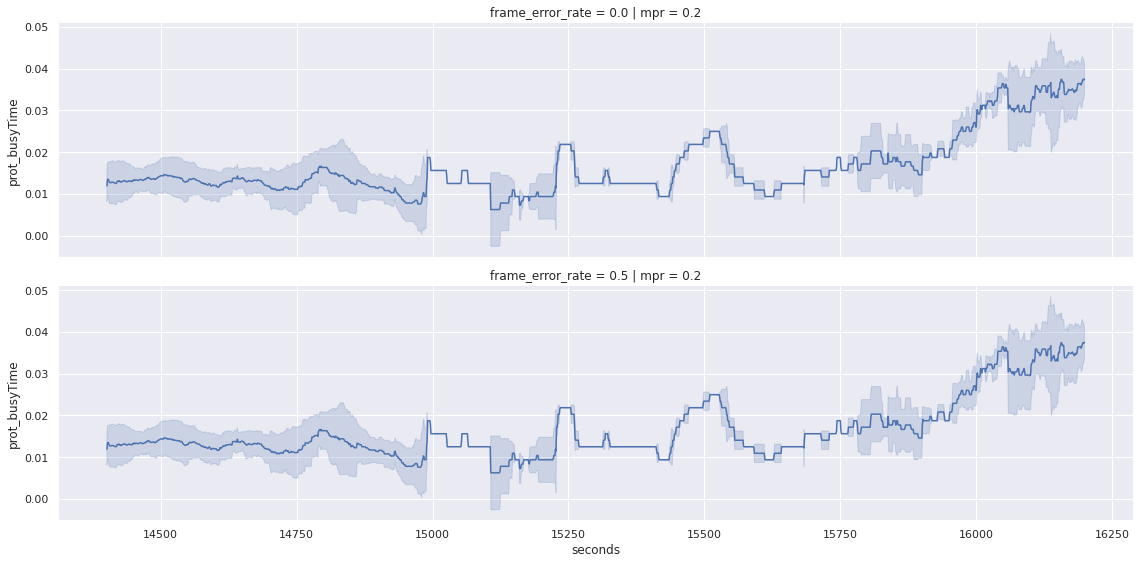

In [17]:
sns.relplot(x='seconds', y='prot_busyTime', kind='line', row="frame_error_rate", col="mpr", data=df[df.mpr==0.2][df.controller=="\"CACC\""], height=PLOT_HEIGHT, aspect=PLOT_ASPECT*2, ci='sd')

In [55]:
df[df.run_id==0].sample(10)

node_id  run_id  seconds  frame_error_rate controller  mpr  \
86143       149       0  15829.1               0.0     "CACC"  0.0   
33285        80       0  14946.1               0.0     "CACC"  0.0   
126202      301       0  16138.1               0.0     "CACC"  0.0   
9983          8       0  14633.0               0.0     "CACC"  0.0   
113573      199       0  16044.3               0.0     "CACC"  0.0   
33522        81       0  15010.1               0.0     "CACC"  0.0   
107136      224       0  16030.1               0.0     "CACC"  0.0   
117271      271       0  16095.1               0.0     "CACC"  0.0   
20002        14       0  14844.0               0.0     "CACC"  0.0   
10037         8       0  14687.0               0.0     "CACC"  0.0   

        mobility_posx  mobility_posy  mobility_acceleration  \
86143     1930.670143    6440.956877               0.345829   
33285     7140.256516    4360.448388              -0.395097   
126202   11316.695159    1829.346101              -0.006852   
9983      2301.108458    6709.969405               1.821835   
113573    9107.922479    3380.574370              -0.087595   
33522     6628.169709    4618.045004               0.344589   
107136   10940.299403    1980.834092              -0.677668   
117271    4575.641517    5574.969945               0.096367   
20002     3403.212104    6398.434042               0.532817   
10037      672.276931    6112.790397              -0.685304   

        mobility_co2emission  ...  appl_speed  appl_acceleration  \
86143               8.952744  ...   33.378584          -0.884693   
33285               1.204751  ...   23.538215           0.624075   
126202              5.175907  ...   30.579106           0.452049   
9983               20.674604  ...   33.024911           1.846632   
113573              3.414366  ...   25.893352          -0.738471   
33522               8.204059  ...   31.640065          -0.271790   
107136              0.973000  ...   25.284190           0.923273   
117271              4.551485  ...   25.834206           0.244935   
20002               7.572295  ...   26.613067          -0.563500   
10037               0.743679  ...   33.960047           0.516128   

        appl_leaderDistance  appl_relativeSpeed  appl_controllerAcceleration  \
86143         1.329561e-316       9.387247e-323                          0.0   
33285         1.403708e-316       9.387247e-323                          0.0   
126202        1.385938e-316       9.387247e-323                          0.0   
9983          1.439713e-316       9.387247e-323                          0.0   
113573        1.352439e-316       9.387247e-323                          0.0   
33522         1.414065e-316       9.387247e-323                          0.0   
107136        3.356968e-315       9.387247e-323                          0.0   
117271        1.363697e-316       9.387247e-323                          0.0   
20002         1.371580e-316       9.387247e-323                          0.0   
10037         1.381027e-316       9.387247e-323                          0.0   

        appl_distanceTravelled  appl_laneIdx  prot_nodeId  prot_busyTime  \
86143             14804.950203             0          NaN            NaN   
33285              6511.489530             0          NaN            NaN   
126202             4197.446584             1          NaN            NaN   
9983              14102.488898             0        530.0            0.0   
113573            10231.197133             0          NaN            NaN   
33522              9783.656534             1          NaN            NaN   
107136             4543.719200             0          NaN            NaN   
117271             3688.383777             0          NaN            NaN   
20002             13592.735120             0        536.0            0.0   
10037             15935.461451             0        530.0            0.0   

        prot_collisions  
86143               NaN  
33285               NaN 

In [20]:
def do_comparison(a_name, a_data, b_name, b_data, attrs, p=0.05):
    for attr in attrs:
        sr = stats.ks_2samp(a_data[attr], b_data[attr])
        fig, axes = plt.subplots(1, 2, sharey=True, figsize=(PLOT_HEIGHT*PLOT_ASPECT*2, PLOT_HEIGHT))
        axes[0].set_title(a_name)
        axes[1].set_title(b_name)
        fig.suptitle(f"statistic={sr.statistic:.3f} p={sr.pvalue:.3f} (two-tailed)")
        sns.distplot(a_data[attr].dropna(), ax=axes[0])
        sns.distplot(b_data[attr].dropna(), ax=axes[1])

In [17]:
df.groupby(df.run_id)[['controller','mpr','frame_error_rate']].first()

controller  mpr  frame_error_rate
run_id                                  
0          "CACC"  0.0               0.0
1          "CACC"  0.0               0.5
2         "PLOEG"  0.0               0.0
3         "PLOEG"  0.0               0.5
4          "CACC"  0.2               0.0
5          "CACC"  0.2               0.5
6         "PLOEG"  0.2               0.0
7         "PLOEG"  0.2               0.5
8          "CACC"  0.7               0.0
9          "CACC"  0.7               0.5
10        "PLOEG"  0.7               0.0
11        "PLOEG"  0.7               0.5

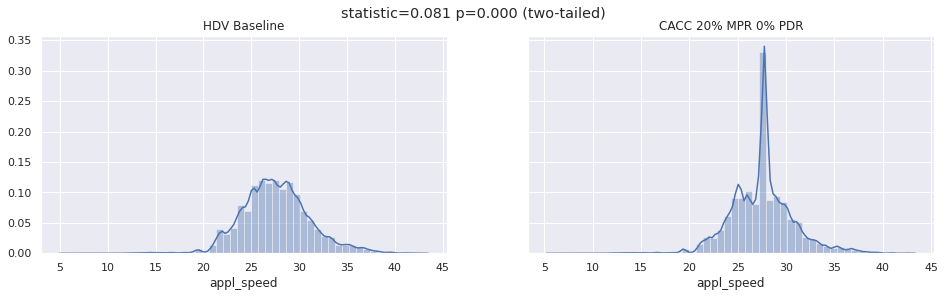

In [18]:
# Comparison of baseline HDV scenarios at low traffic
do_comparison("HDV Baseline", df[df.run_id==0], "CACC 20% MPR 0% PDR", df[df.run_id==4], ['appl_speed'])

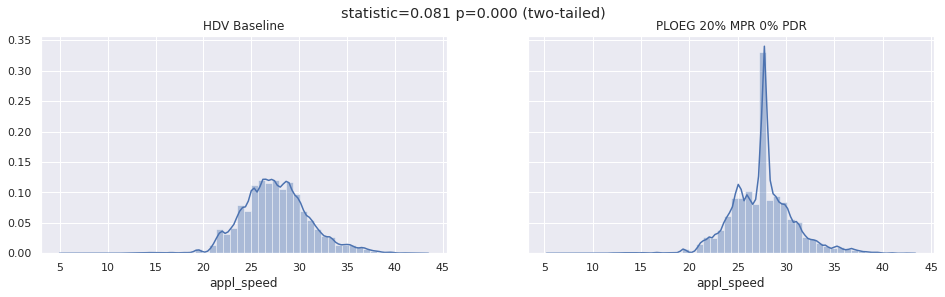

In [19]:
do_comparison("HDV Baseline", df[df.run_id==0], "PLOEG 20% MPR 0% PDR", df[df.run_id==6], ['appl_speed'])

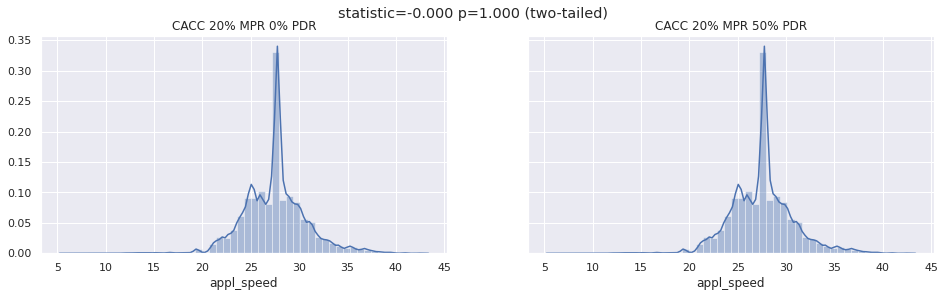

In [20]:
do_comparison("CACC 20% MPR 0% PDR", df[df.run_id==4], "CACC 20% MPR 50% PDR", df[df.run_id==5], ['appl_speed'])

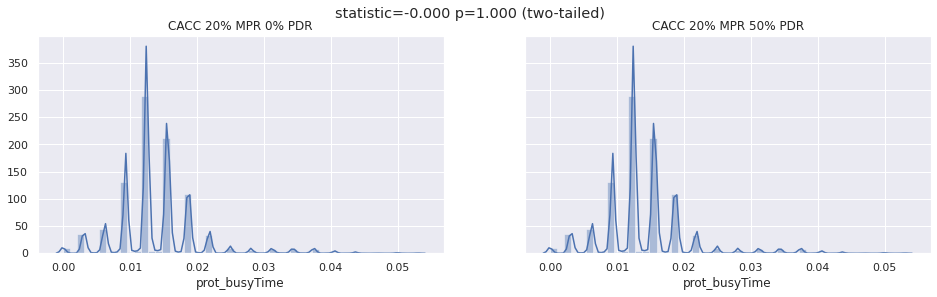

In [14]:
do_comparison("CACC 20% MPR 0% PDR", df[df.run_id==4], "CACC 20% MPR 50% PDR", df[df.run_id==5], ['prot_busyTime'])

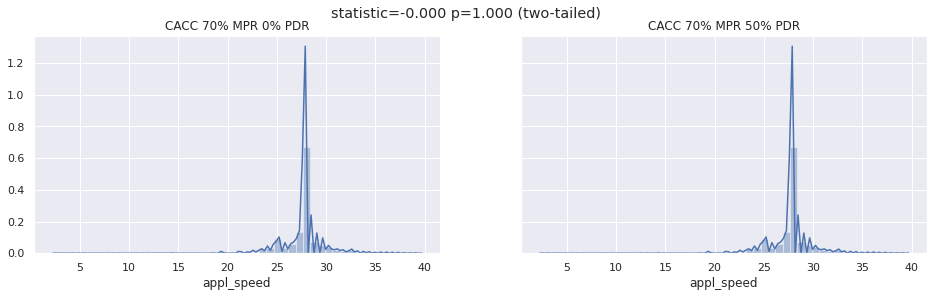

In [21]:
do_comparison("CACC 70% MPR 0% PDR", df[df.run_id==8], "CACC 70% MPR 50% PDR", df[df.run_id==9], ['appl_speed'])

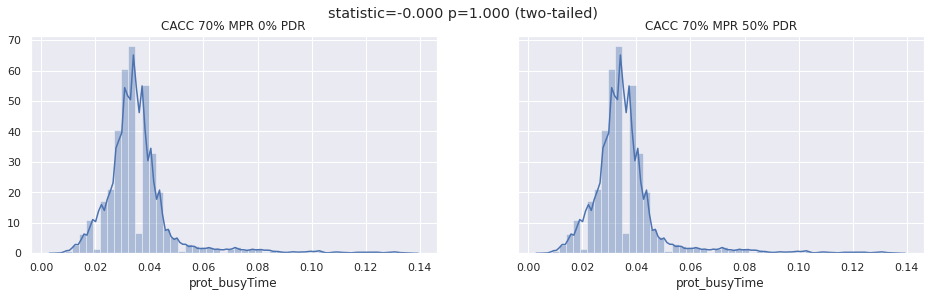

In [15]:
do_comparison("CACC 70% MPR 0% PDR", df[df.run_id==8], "CACC 70% MPR 50% PDR", df[df.run_id==9], ['prot_busyTime'])

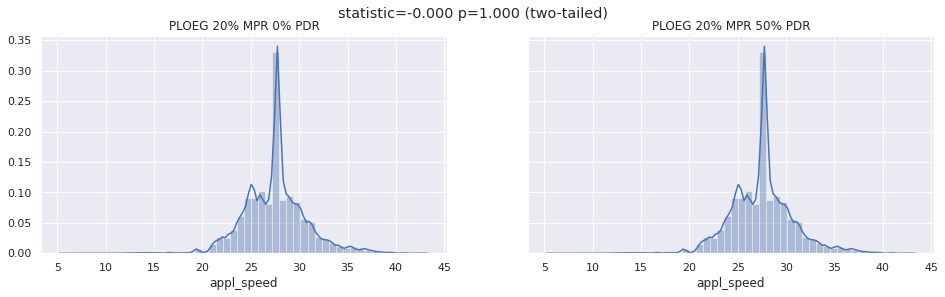

In [22]:
do_comparison("PLOEG 20% MPR 0% PDR", df[df.run_id==6], "PLOEG 20% MPR 50% PDR", df[df.run_id==7], ['appl_speed'])

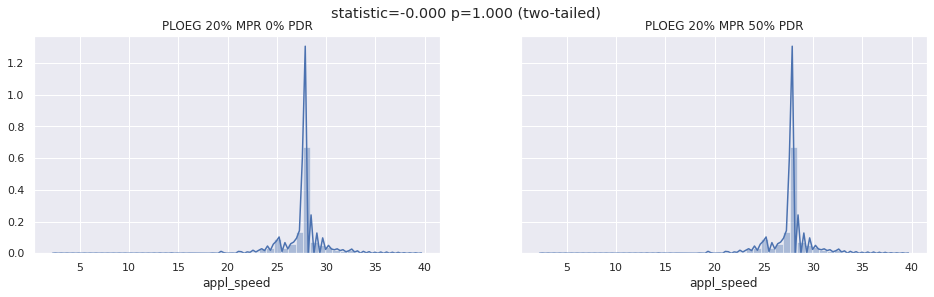

In [23]:
do_comparison("PLOEG 20% MPR 0% PDR", df[df.run_id==10], "PLOEG 20% MPR 50% PDR", df[df.run_id==11], ['appl_speed'])

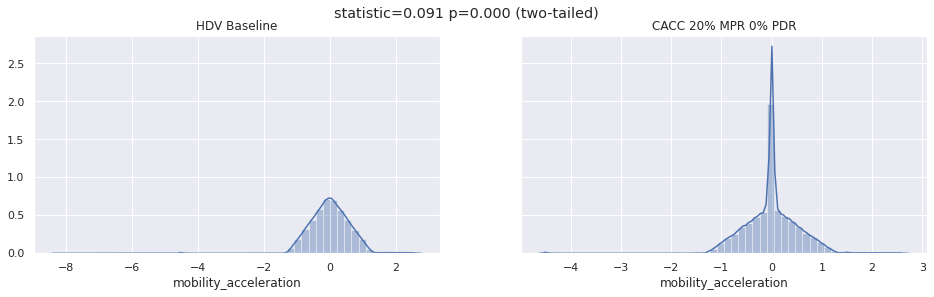

In [46]:
do_comparison("HDV Baseline", df[df.run_id==0], "CACC 20% MPR 0% PDR", df[df.run_id==4], ['mobility_acceleration'])

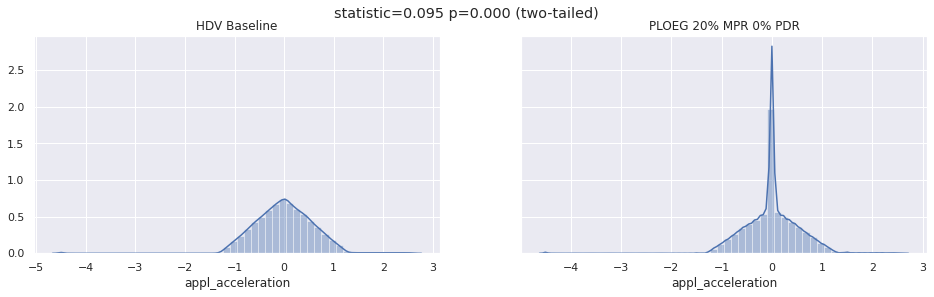

In [48]:
do_comparison("HDV Baseline", df[df.run_id==0], "PLOEG 20% MPR 0% PDR", df[df.run_id==6], ['appl_acceleration'])

In [22]:
# Class for reading the edgedata emitted by sql2edgedata.py
import xml
from xml.sax.handler import ContentHandler

class EdgeDataReader(ContentHandler):
    def __init__(self):
        self._start = None
        self._end = None
        self.data = []
    
    def startElement(self, name, attrs):
        if name == "interval":
            self._start = float(attrs.get("begin"))
            self._end = float(attrs.get("end"))
        if name == "edge":
            self.data.append({
                'edge_id':             attrs.get("id"),
                'speed':               float(attrs.get("speed")),
                'length':              float(attrs.get("length")),
                'avg_speed':           float(attrs.get("avg_speed")),
                'min_speed':           float(attrs.get("min_speed")),
                'max_speed':           float(attrs.get("max_speed")),
                'stdev_speed':         float(attrs.get("stdev_speed")) if attrs.get("stdev_speed") else np.nan,
                'travelrate':          float(attrs.get("travelrate")),
                'congestion_index':    float(attrs.get("congestion_index")),
            })

In [23]:
import re
from copy import deepcopy

runid_mpr = [0, 0, 0, 0, 0.2, 0.2, 0.2, 0.2, 0.7, 0.7, 0.7, 0.7]
runid_controller = ["HDV", "HDV", "HDV", "HDV", "CACC", "CACC", "PLOEG", "PLOEG", "CACC", "CACC", "PLOEG", "PLOEG"]
runid_fer = [0.0, 0.5] * 6
xp = xml.sax.make_parser()
xp.setFeature(xml.sax.handler.feature_namespaces, 0)
r = EdgeDataReader()
xp.setContentHandler(r)
ptrn = re.compile(r"^.*?edgedata_[^_]+_(\d+)_.*.xml$")
edgedata = list()
for f in glob.glob('../results/edgedata_LowTraffic_*.xml'):
    run_id = int(ptrn.match(f).group(1))
    xp.parse(f)
    for d in r.data:
        d1 = {
            'run_id': run_id,
            'mpr': runid_mpr[run_id],
            'controller': runid_controller[run_id],
            'frame_error_rate': runid_fer[run_id],
        }
        d1.update(d)
        edgedata.append(d1)
    r.data.clear()

In [24]:
edge_df = pd.DataFrame.from_dict(edgedata)
edge_df.sample(10)

run_id  mpr controller  frame_error_rate  \
2857       3  0.0        HDV               0.5   
346        6  0.2      PLOEG               0.0   
43        11  0.7      PLOEG               0.5   
2397       8  0.7       CACC               0.0   
2401       8  0.7       CACC               0.0   
2853       3  0.0        HDV               0.5   
1077       0  0.0        HDV               0.0   
11        11  0.7      PLOEG               0.5   
331        6  0.2      PLOEG               0.0   
1302       4  0.2       CACC               0.0   

                              edge_id  speed  length  avg_speed  min_speed  \
2857                       -128497195  22.22   84.26  21.004384  20.345202   
346                         :386696_2  27.78    7.36  26.715922  21.373501   
43        123961236#7-AddedOnRampEdge  27.78   92.09  27.323895  21.188371   
2397     123961236#9-AddedOffRampEdge  27.78  102.37  27.419050  21.183616   
2401      123961236#1-AddedOnRampEdge  27.78   92.08  27.347699  20.492113   
2853                        123959660  16.67   67.71  18.322883  16.507661   
1077      123961236#9-AddedOnRampEdge  27.78   91.98  26.936927  20.741744   
11                            4258460  27.78  789.63  27.270840  21.168819   
331       123965879#4-AddedOnRampEdge  27.78   92.03  26.991325  19.374914   
1302  :123961236#13-AddedOnRampNode_0  27.78    8.20  27.401249  21.251465   

      max_speed  stdev_speed  travelrate  congestion_index  
2857  21.398592     0.440140    0.793501          0.057874  
346   31.825055     2.649873    0.623860          0.039829  
43    32.639435     2.028929    0.609979          0.016693  
2397  32.963647     1.859557    0.607862          0.013164  
2401  32.654468     1.835424    0.609448          0.015808  
2853  21.214845     1.956620    0.909628         -0.090209  
1077  36.632253     3.146044    0.618742          0.031298  
11    32.981593     1.952950    0.611166          0.018671  
331   35.345835     2.610437    0.617495          0.029220  
1302  34.064853     2.666722    0.608257          0.013822

In [25]:
edge_df.groupby(edge_df.run_id)[['controller','mpr','frame_error_rate']].first()

controller  mpr  frame_error_rate
run_id                                  
0             HDV  0.0               0.0
1             HDV  0.0               0.5
2             HDV  0.0               0.0
3             HDV  0.0               0.5
4            CACC  0.2               0.0
5            CACC  0.2               0.5
6           PLOEG  0.2               0.0
7           PLOEG  0.2               0.5
8            CACC  0.7               0.0
9            CACC  0.7               0.5
10          PLOEG  0.7               0.0
11          PLOEG  0.7               0.5

In [26]:
edge_df.groupby(['run_id', 'controller', 'mpr', 'frame_error_rate'])['travelrate'].mean()

run_id  controller  mpr  frame_error_rate
0       HDV         0.0  0.0                 0.710235
1       HDV         0.0  0.5                 0.710235
2       HDV         0.0  0.0                 0.710235
3       HDV         0.0  0.5                 0.710235
4       CACC        0.2  0.0                 0.704294
5       CACC        0.2  0.5                 0.704294
6       PLOEG       0.2  0.0                 0.704294
7       PLOEG       0.2  0.5                 0.704294
8       CACC        0.7  0.0                 0.710119
9       CACC        0.7  0.5                 0.710119
10      PLOEG       0.7  0.0                 0.710119
11      PLOEG       0.7  0.5                 0.710119
Name: travelrate, dtype: float64

In [27]:
edge_df.groupby(['run_id', 'controller', 'mpr', 'frame_error_rate'])['congestion_index'].mean()

run_id  controller  mpr  frame_error_rate
0       HDV         0.0  0.0                 0.032590
1       HDV         0.0  0.5                 0.032590
2       HDV         0.0  0.0                 0.032590
3       HDV         0.0  0.5                 0.032590
4       CACC        0.2  0.0                 0.020251
5       CACC        0.2  0.5                 0.020251
6       PLOEG       0.2  0.0                 0.020251
7       PLOEG       0.2  0.5                 0.020251
8       CACC        0.7  0.0                 0.042831
9       CACC        0.7  0.5                 0.042831
10      PLOEG       0.7  0.0                 0.042831
11      PLOEG       0.7  0.5                 0.042831
Name: congestion_index, dtype: float64

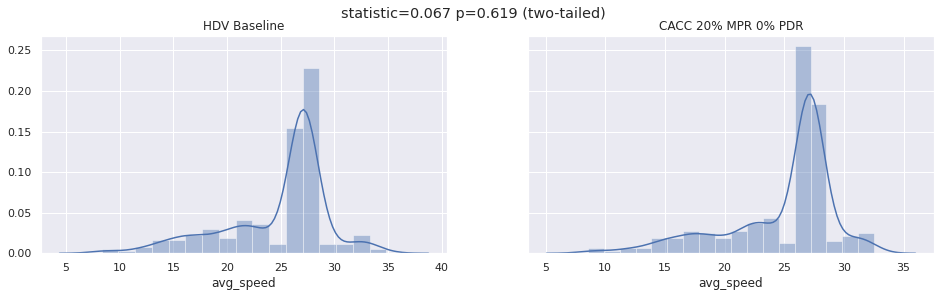

In [30]:
do_comparison("HDV Baseline", edge_df[edge_df.run_id==0], "CACC 20% MPR 0% PDR", edge_df[edge_df.run_id==4], ['avg_speed'])

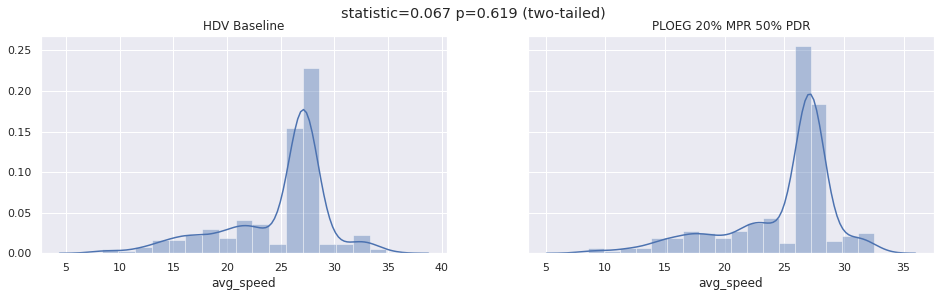

In [31]:
do_comparison("HDV Baseline", edge_df[edge_df.run_id==0], "PLOEG 20% MPR 50% PDR", edge_df[edge_df.run_id==6], ['avg_speed'])

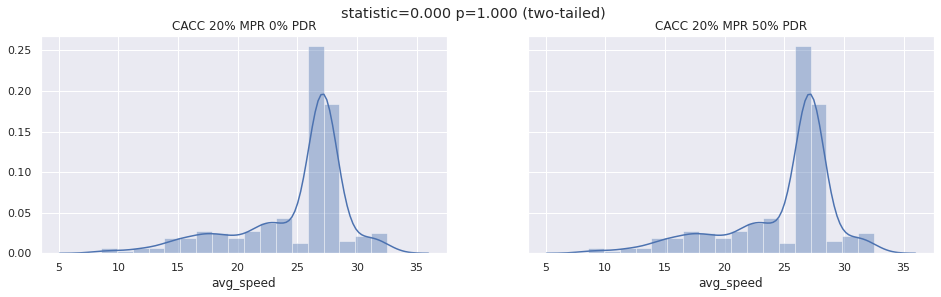

In [32]:
do_comparison("CACC 20% MPR 0% PDR", edge_df[edge_df.run_id==4], "CACC 20% MPR 50% PDR", edge_df[edge_df.run_id==5], ['avg_speed'])

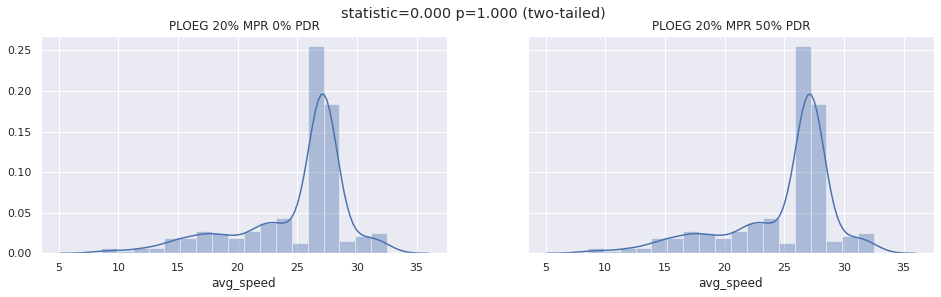

In [33]:
do_comparison("PLOEG 20% MPR 0% PDR", edge_df[edge_df.run_id==6], "PLOEG 20% MPR 50% PDR", edge_df[edge_df.run_id==7], ['avg_speed'])

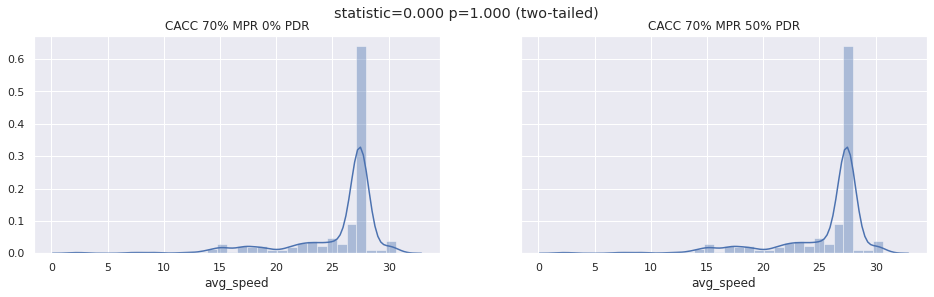

In [34]:
do_comparison("CACC 70% MPR 0% PDR", edge_df[edge_df.run_id==8], "CACC 70% MPR 50% PDR", edge_df[edge_df.run_id==9], ['avg_speed'])

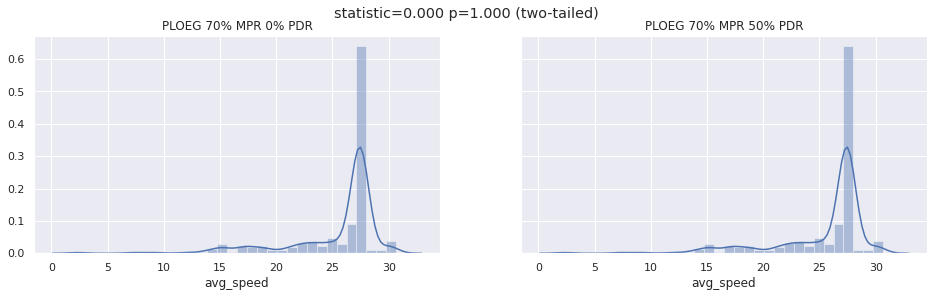

In [35]:
do_comparison("PLOEG 70% MPR 0% PDR", edge_df[edge_df.run_id==10], "PLOEG 70% MPR 50% PDR", edge_df[edge_df.run_id==11], ['avg_speed'])

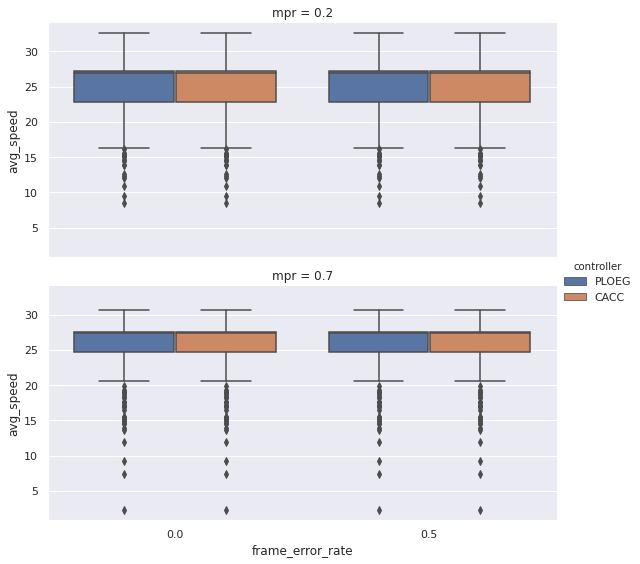

In [36]:
g = sns.catplot(data=edge_df[edge_df.mpr>0], x="frame_error_rate", y="avg_speed", hue="controller", row="mpr", kind="box", height=PLOT_HEIGHT, aspect=PLOT_ASPECT)

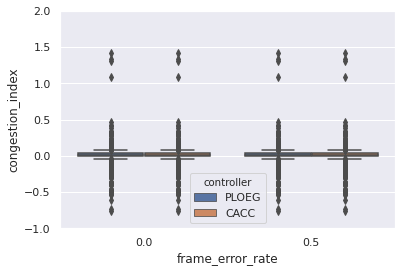

In [37]:
fig, ax = plt.subplots(1, 1)
ax.set(ylim=(-1,2))
sns.boxplot(data=edge_df[edge_df.mpr>0], x="frame_error_rate", y="congestion_index", hue="controller", ax=ax)

[Text(0, 0.5, 'Average Speed (m/s)')]

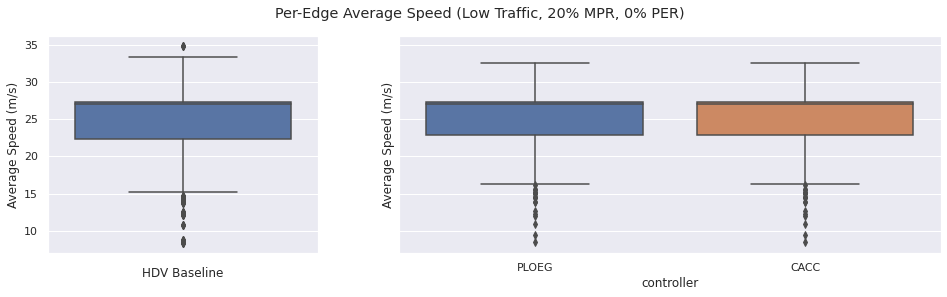

In [38]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(PLOT_HEIGHT*PLOT_ASPECT*2, PLOT_HEIGHT), gridspec_kw={'width_ratios': [1, 2]})
sns.boxplot(data=edge_df[edge_df.controller=="HDV"], y="avg_speed", ax=axes[0])
sns.boxplot(data=edge_df[edge_df.controller!="HDV"][edge_df.frame_error_rate==0][edge_df.mpr==0.2], y="avg_speed", x="controller", ax=axes[1])
fig.suptitle("Per-Edge Average Speed (Low Traffic, 20% MPR, 0% PER)")
axes[0].set(xlabel="HDV Baseline", ylabel="Average Speed (m/s)")
axes[1].set(ylabel="Average Speed (m/s)")

[Text(0, 0.5, 'Average Speed (m/s)')]

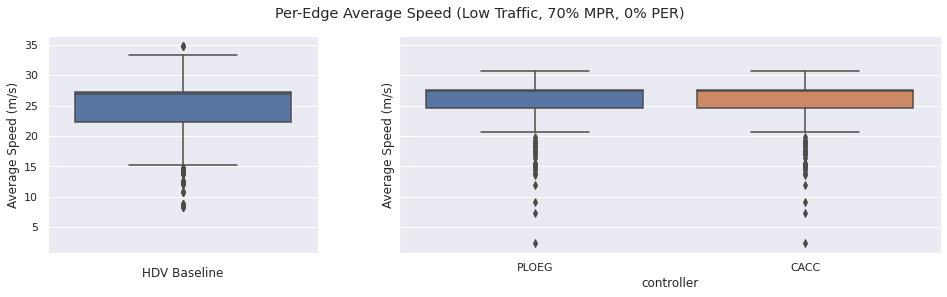

In [39]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(PLOT_HEIGHT*PLOT_ASPECT*2, PLOT_HEIGHT), gridspec_kw={'width_ratios': [1, 2]})
sns.boxplot(data=edge_df[edge_df.controller=="HDV"], y="avg_speed", ax=axes[0])
sns.boxplot(data=edge_df[edge_df.controller!="HDV"][edge_df.frame_error_rate==0][edge_df.mpr==0.7], y="avg_speed", x="controller", ax=axes[1])
fig.suptitle("Per-Edge Average Speed (Low Traffic, 70% MPR, 0% PER)")
axes[0].set(xlabel="HDV Baseline", ylabel="Average Speed (m/s)")
axes[1].set(ylabel="Average Speed (m/s)")

[Text(0, 0.5, 'Average Speed (m/s)')]

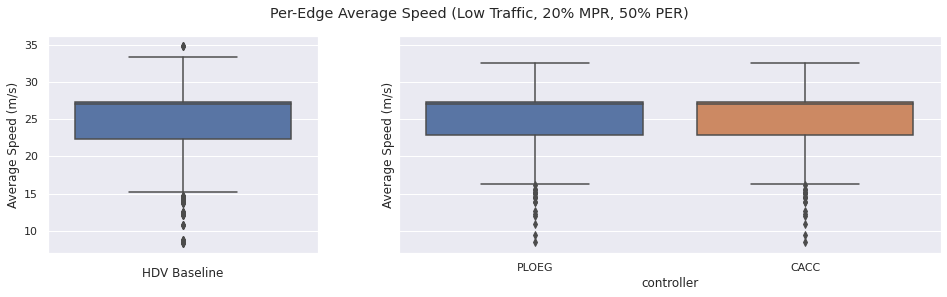

In [40]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(PLOT_HEIGHT*PLOT_ASPECT*2, PLOT_HEIGHT), gridspec_kw={'width_ratios': [1, 2]})
sns.boxplot(data=edge_df[edge_df.controller=="HDV"], y="avg_speed", ax=axes[0])
sns.boxplot(data=edge_df[edge_df.controller!="HDV"][edge_df.frame_error_rate==0.5][edge_df.mpr==0.2], y="avg_speed", x="controller", ax=axes[1])
fig.suptitle("Per-Edge Average Speed (Low Traffic, 20% MPR, 50% PER)")
axes[0].set(xlabel="HDV Baseline", ylabel="Average Speed (m/s)")
axes[1].set(ylabel="Average Speed (m/s)")

[Text(0, 0.5, 'Average Speed (m/s)')]

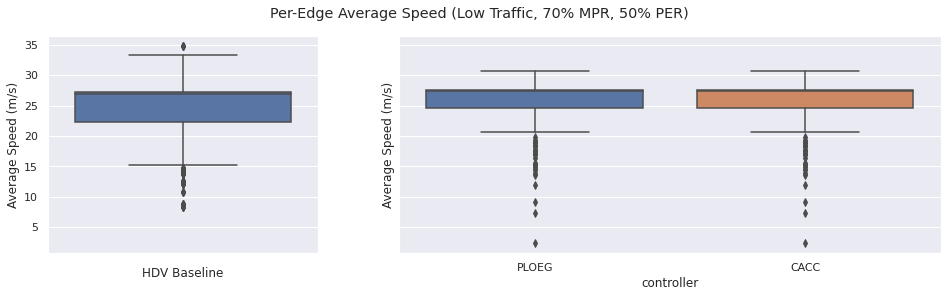

In [41]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(PLOT_HEIGHT*PLOT_ASPECT*2, PLOT_HEIGHT), gridspec_kw={'width_ratios': [1, 2]})
sns.boxplot(data=edge_df[edge_df.controller=="HDV"], y="avg_speed", ax=axes[0])
sns.boxplot(data=edge_df[edge_df.controller!="HDV"][edge_df.frame_error_rate==0.5][edge_df.mpr==0.7], y="avg_speed", x="controller", ax=axes[1])
fig.suptitle("Per-Edge Average Speed (Low Traffic, 70% MPR, 50% PER)")
axes[0].set(xlabel="HDV Baseline", ylabel="Average Speed (m/s)")
axes[1].set(ylabel="Average Speed (m/s)")

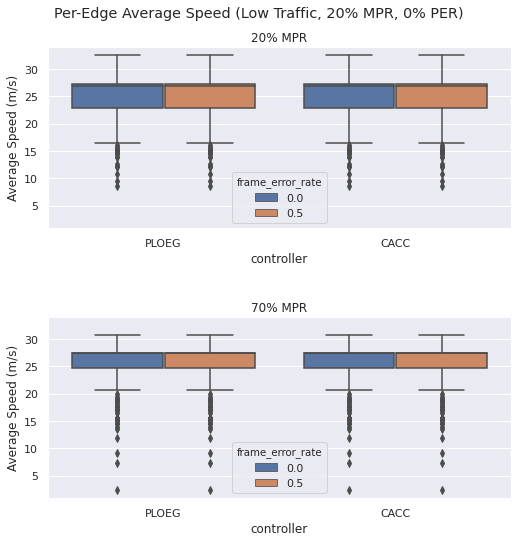

In [29]:
fig, axes = plt.subplots(2, 1, sharey=True, figsize=(PLOT_HEIGHT*PLOT_ASPECT, PLOT_HEIGHT*2))
sns.boxplot(data=edge_df[edge_df.controller!="HDV"][edge_df.mpr==0.2], y="avg_speed", x="controller", hue="frame_error_rate", ax=axes[0])
sns.boxplot(data=edge_df[edge_df.controller!="HDV"][edge_df.mpr==0.7], y="avg_speed", x="controller", hue="frame_error_rate", ax=axes[1])
fig.suptitle("Per-Edge Average Speed (Low Traffic, 20% MPR, 0% PER)")
axes[0].set(ylabel="Average Speed (m/s)", title="20% MPR")
axes[1].set(ylabel="Average Speed (m/s)", title="70% MPR")
fig.tight_layout(pad=3.0)